# **Figure 2**. Snapshots
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created | 04/20/2022          |
| Updated | 08/02/2022          |

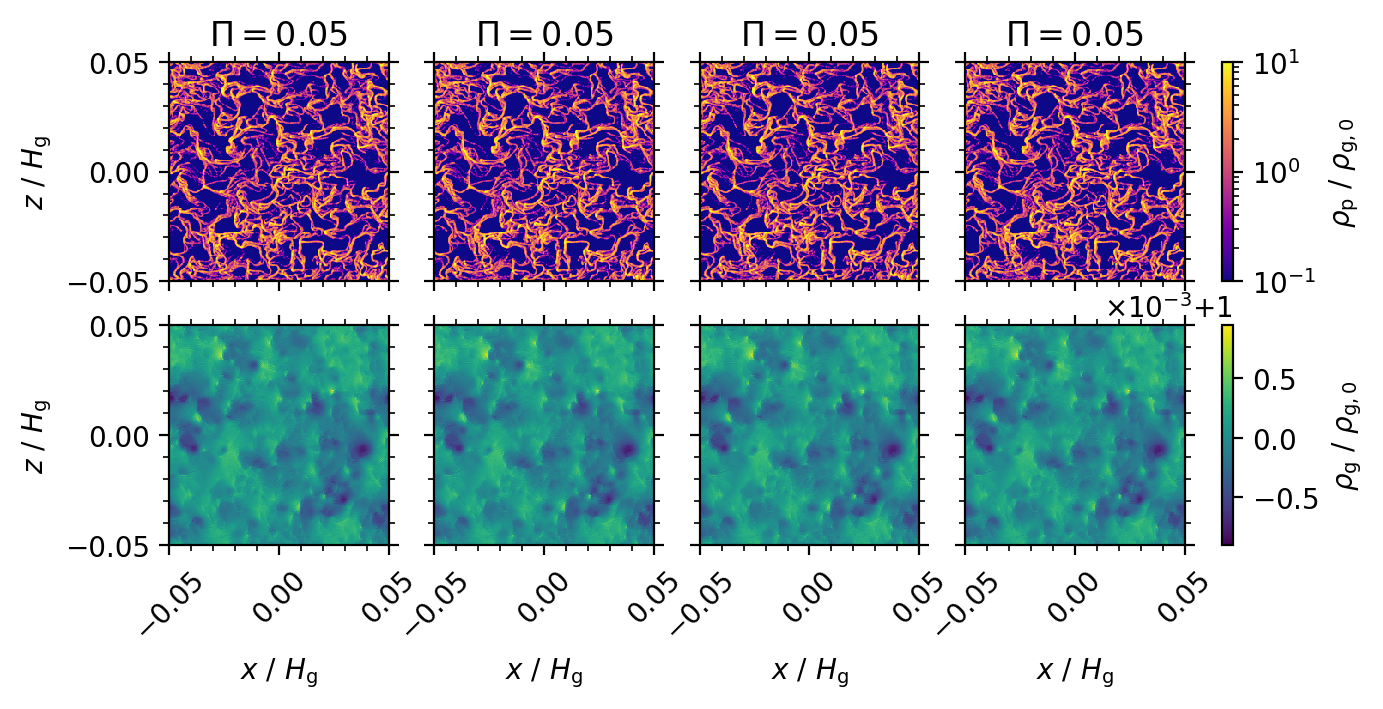

In [4]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import numpy as np

fig, axs = plt.subplots(2, 4, figsize=(8, 3.2), dpi=200)
# fig.subplots_adjust(wspace=0.5, hspace=0.5)
workdir = '../unstrat'
case = 'AB'
Pis = ['0.05', '0.05', '0.05', '0.05']
# Pis = ['0.01', '0.01', '0.05', '0.05']
res = '256'
# res = '1024'
vmin_p, vmax_p = 1e-1, 1e1 # AB CPDD > 85%; CPDD < 5%

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xf, zf = data['x1f']/H_g, data['x2f']/H_g
    t = data['Time']
    clip = np.clip(data['rhop'][0], vmin_p, vmax_p)
    if i == 0:
        vmin_g = np.amin(data['rho'][0])
        vmax_g = np.amax(data['rho'][0])
    j = len(Pis) - 1 - i
    rhops = axs[0][j].pcolormesh(xf, zf, clip, norm=colors.LogNorm(), cmap='plasma')
    rhogs = axs[1][j].pcolormesh(xf, zf, data['rho'][0], vmin=vmin_g, vmax=vmax_g)
    axs[0][j].set(title=f'$\Pi={Pi:s}$', aspect='equal')
    axs[1][j].set(xlabel=r'$x$ / $H_\mathrm{g}$', aspect='equal')

for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Add and format color bars
mpl.rcParams["axes.formatter.offset_threshold"] = 2
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-1, 1))
cb_rhop = fig.colorbar(rhops, ax=axs.flat[:4], pad=0.03)
cb_rhog = fig.colorbar(rhogs, ax=axs.flat[4:], pad=0.03, format=formatter)
# cb_rhog.ax.yaxis.set_offset_position('left')
cb_rhop.set_label(r'$\rho_\mathrm{p}$ / $\rho_\mathrm{g,0}$')
cb_rhog.set_label(r'$\rho_\mathrm{g}$ / $\rho_\mathrm{g,0}$')

# Format and save figure
axs[0][0].set(ylabel=r'$z$ / $H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z$ / $H_\mathrm{g}$')
plt.savefig(f'figs/{case}_snaps.png', dpi=1000, bbox_inches='tight', pad_inches=0.01)

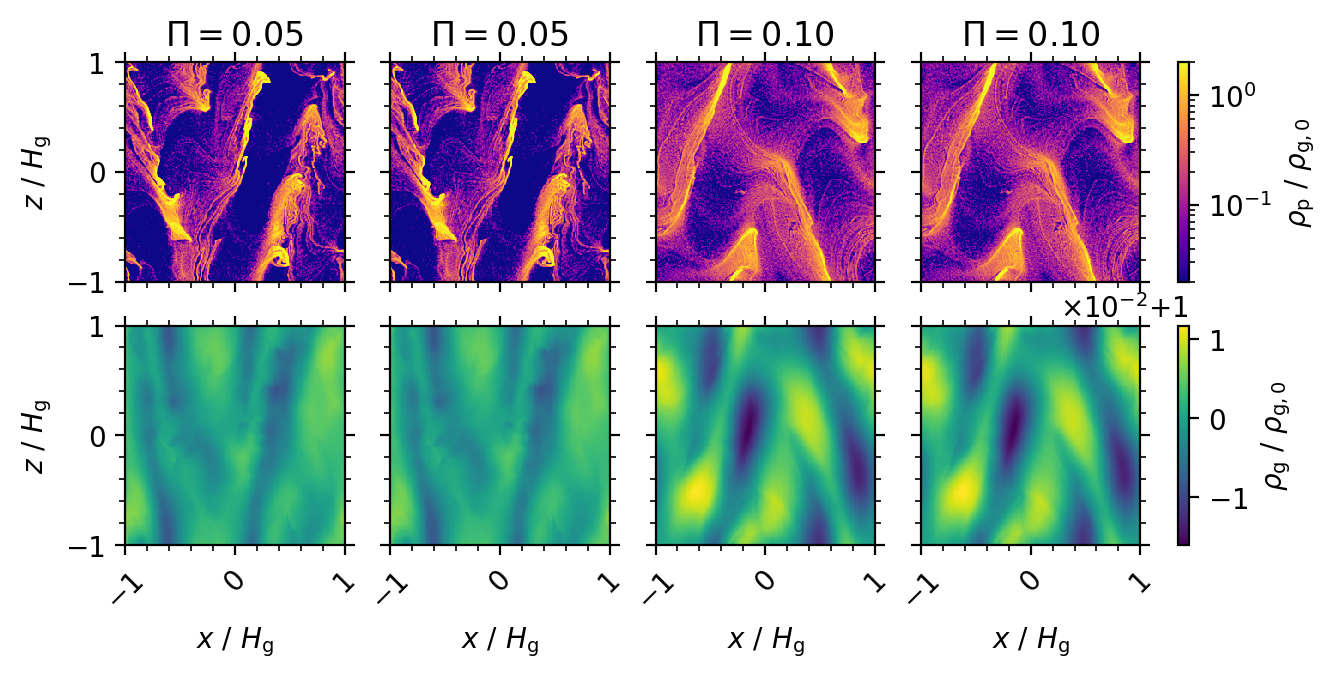

In [8]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import numpy as np

fig, axs = plt.subplots(2, 4, figsize=(8, 3.2), dpi=200)
# fig.subplots_adjust(wspace=0.5, hspace=0.5)
workdir = '../unstrat'
case = 'BA'
Pis = ['0.10', '0.10', '0.05', '0.05']
res = '256'
vmin_p, vmax_p = 2e-2, 2e0 # BA CPDD > 85%; CPDD < 5%
vmin_g, vmax_g = 0, 0

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xf, zf = data['x1f']/H_g, data['x2f']/H_g
    t = data['Time']
    clip = np.clip(data['rhop'][0], vmin_p, vmax_p)
    if i == 0:
        vmin_g = np.amin(data['rho'][0])
        vmax_g = np.amax(data['rho'][0])
    j = len(Pis) - 1 - i
    rhops = axs[0][j].pcolormesh(xf, zf, clip, norm=colors.LogNorm(), cmap='plasma')
    rhogs = axs[1][j].pcolormesh(xf, zf, data['rho'][0], vmin=vmin_g, vmax=vmax_g)
    axs[0][j].set(title=f'$\Pi={Pi:s}$', aspect='equal')
    axs[1][j].set(xlabel=r'$x$ / $H_\mathrm{g}$', aspect='equal')

for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Add and format color bars
mpl.rcParams["axes.formatter.offset_threshold"] = 2
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-1, 1))
cb_rhop = fig.colorbar(rhops, ax=axs.flat[:4], pad=0.03)
cb_rhog = fig.colorbar(rhogs, ax=axs.flat[4:], pad=0.03, format=formatter)
# cb_rhog.ax.yaxis.set_offset_position('left')
cb_rhop.set_label(r'$\rho_\mathrm{p}$ / $\rho_\mathrm{g,0}$')
cb_rhog.set_label(r'$\rho_\mathrm{g}$ / $\rho_\mathrm{g,0}$')

# Format and save figure
axs[0][0].set(ylabel=r'$z$ / $H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z$ / $H_\mathrm{g}$')
plt.savefig(f'figs/{case}_snaps.png', dpi=1000, bbox_inches='tight', pad_inches=0.01)